In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

2023-12-05 15:12:55.261195: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 15:12:55.310444: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 15:12:55.311019: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-05 15:12:56.191720: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### 1. Dataset

In [2]:
cifar10 = keras.datasets.cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
train_labels.shape

(50000, 1)

In [5]:
test_labels.shape

(10000, 1)

In [6]:
train_images[0].shape

(32, 32, 3)

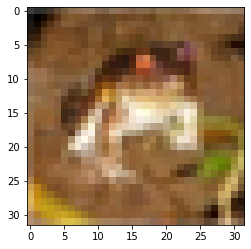

In [7]:
plt.imshow(train_images[0])

#### 1.1 Tratamento

Devido a estrutura dos dados, será necessário normalizar a imagem.

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
np.random.seed(312)
tf.random.set_seed(312)

### 2. Treinamento
Conforme o exercício pede, vamos começar com 20 camadas de 100 neurônios e ELU com Inicialização He.

In [14]:
modelo = keras.Sequential()
modelo.add(keras.layers.Flatten(input_shape = (32, 32, 3)))

for _ in range(20):
    modelo.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))

modelo.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [16]:
modelo.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
treinamento = modelo.fit(train_images, train_labels, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100


2023-12-05 15:13:13.349392: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 [==============================] - 15s 8ms/step - loss: 2.0343 - accuracy: 0.2606 - val_loss: 1.8635 - val_accuracy: 0.3141
Epoch 2/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.8302 - accuracy: 0.3378 - val_loss: 1.8885 - val_accuracy: 0.3085
Epoch 3/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7714 - accuracy: 0.3577 - val_loss: 1.7297 - val_accuracy: 0.3763
Epoch 4/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7264 - accuracy: 0.3765 - val_loss: 1.7733 - val_accuracy: 0.3762
Epoch 5/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6850 - accuracy: 0.3937 - val_loss: 1.7050 - val_accuracy: 0.3912
Epoch 6/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6547 - accuracy: 0.4060 - val_loss: 1.7336 - val_accuracy: 0.3836
Epoch 7/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6330 - accuracy: 0.4149 - val_loss: 1.6209 - val_accurac

In [18]:
test_loss, test_acc = modelo.evaluate(test_images, test_labels, verbose=2)
print(f'\nResultado do Teste: {test_acc:.4f}')

313/313 - 1s - loss: 1.5395 - accuracy: 0.4566 - 1s/epoch - 3ms/step

Resultado do Teste: 0.4566


Acurácia de 45.6% e mais ou menos 3 minutos de treinamento.

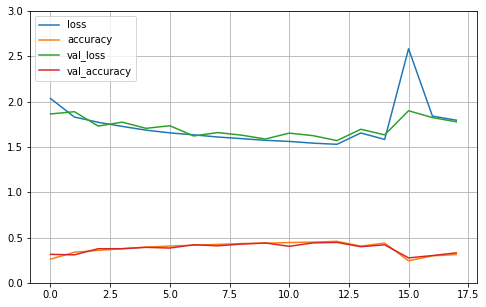

In [20]:
import pandas as pd

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3) # Restringindo o Eixo y
plt.show()

#### 2.1 Batch Normalization (Letra C)

In [22]:
modelo = keras.Sequential()
modelo.add(keras.layers.Flatten(input_shape = (32, 32, 3)))

for _ in range(20):
    modelo.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    modelo.add(keras.layers.BatchNormalization())
    modelo.add(keras.layers.Activation("elu"))

modelo.add(keras.layers.Dense(10, activation="softmax"))

modelo.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(train_images, train_labels, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100


2023-12-05 15:20:13.418431: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 [==============================] - 28s 14ms/step - loss: 1.8618 - accuracy: 0.3334 - val_loss: 1.8546 - val_accuracy: 0.3196
Epoch 2/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.7030 - accuracy: 0.3946 - val_loss: 1.7881 - val_accuracy: 0.3787
Epoch 3/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.6346 - accuracy: 0.4187 - val_loss: 1.8311 - val_accuracy: 0.3396
Epoch 4/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.5800 - accuracy: 0.4374 - val_loss: 1.7582 - val_accuracy: 0.3942
Epoch 5/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.5396 - accuracy: 0.4504 - val_loss: 1.6005 - val_accuracy: 0.4234
Epoch 6/100
1250/1250 [==============================] - 17s 13ms/step - loss: 1.4999 - accuracy: 0.4689 - val_loss: 1.7291 - val_accuracy: 0.3991
Epoch 7/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.4624 - accuracy: 0.4806 - val_loss: 1.6172 - val_

O uso da `BatchNormalization` levou a uma convergência bem mais rápida, de fato. No primeiro modelo, foram necessárias 6 épocas para chega aos 40% de acurácia, e, neste, a 3ª época já estava a frente disso.

Fora isso, a redemelhorou em muito a performance. É incrível como a convergência foi bem mais suave e direcionada, com cada camada evoluindo em performance em relação a anterior.

Em contrapartida, é claro, o treinamento demorou bem mais, cerca de 6 Minutos e 40 Segundos.

In [23]:
test_loss, test_acc = modelo.evaluate(test_images, test_labels, verbose=2)
print(f'\nResultado do Teste: {test_acc:.4f}')

313/313 - 1s - loss: 1.4150 - accuracy: 0.5035 - 1s/epoch - 4ms/step

Resultado do Teste: 0.5035


A queda de perda já até passa a ser algo mais parecido com uma curva, ainda que a validação não siga da mesma forma.

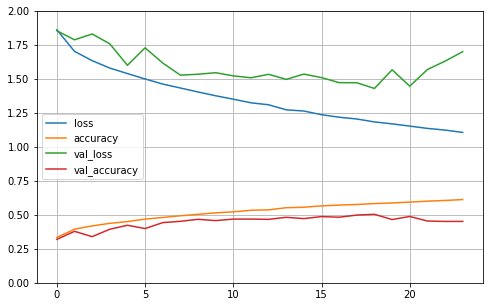

In [24]:
pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # Restringindo o Eixo y
plt.show()

Daqui em diante, otimizar a taxa de aprendizado deve resultar em uma performance melhor do modelo. Eu vou focar somente nos exercícios, entretanto, devido ao longo tempo de treinamento para testar isso.

#### 2.2 Testando SELU (Letra D)

In [25]:
modelo = keras.Sequential()
modelo.add(keras.layers.Flatten(input_shape = (32, 32, 3)))

for _ in range(20):
    modelo.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))

modelo.add(keras.layers.Dense(10, activation="softmax"))

modelo.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(train_images, train_labels, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100


2023-12-05 15:31:20.549817: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 [==============================] - 15s 8ms/step - loss: 2.0667 - accuracy: 0.2185 - val_loss: 1.9850 - val_accuracy: 0.2680
Epoch 2/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9368 - accuracy: 0.2708 - val_loss: 1.9641 - val_accuracy: 0.2697
Epoch 3/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.8766 - accuracy: 0.3090 - val_loss: 1.8663 - val_accuracy: 0.3258
Epoch 4/100
1250/1250 [==============================] - 9s 8ms/step - loss: 1.8432 - accuracy: 0.3205 - val_loss: 1.8253 - val_accuracy: 0.3419
Epoch 5/100
1250/1250 [==============================] - 9s 8ms/step - loss: 1.8201 - accuracy: 0.3326 - val_loss: 2.1159 - val_accuracy: 0.2089
Epoch 6/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.8870 - accuracy: 0.3078 - val_loss: 1.8560 - val_accuracy: 0.3227
Epoch 7/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.8194 - accuracy: 0.3461 - val_loss: 1.8396 - val_accuracy:

Apesar de não ter uma performance melhor, o uso da SeLU diminuiu, LEVEMENTE, o cálculo de cada época se comparado com a original. Mesmo assim, não estou convencido por essa abordagem. O uso de uma LeakyReLU também deveria reduzir a velocidade, e com BatchNormalization o resultado deve ser melhor, não?

In [26]:
test_loss, test_acc = modelo.evaluate(test_images, test_labels, verbose=2)
print(f'\nResultado do Teste: {test_acc:.4f}')

313/313 - 1s - loss: 1.6836 - accuracy: 0.3846 - 1s/epoch - 4ms/step

Resultado do Teste: 0.3846


In [27]:
modelo = keras.Sequential()
modelo.add(keras.layers.Flatten(input_shape = (32, 32, 3)))

for _ in range(20):
    modelo.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    modelo.add(keras.layers.BatchNormalization())
    modelo.add(keras.layers.LeakyReLU(alpha=0.01))

modelo.add(keras.layers.Dense(10, activation="softmax"))

modelo.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(train_images, train_labels, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
1250/1250 [==============================] - 28s 13ms/step - loss: 2.1366 - accuracy: 0.2073 - val_loss: 1.9860 - val_accuracy: 0.2738
Epoch 2/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.9231 - accuracy: 0.2964 - val_loss: 1.9223 - val_accuracy: 0.3062
Epoch 3/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.8432 - accuracy: 0.3326 - val_loss: 1.9532 - val_accuracy: 0.2982
Epoch 4/100
1250/1250 [==============================] - 16s 12ms/step - loss: 1.7744 - accuracy: 0.3618 - val_loss: 1.8351 - val_accuracy: 0.3361
Epoch 5/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.7249 - accuracy: 0.3826 - val_loss: 1.9341 - val_accuracy: 0.3180
Epoch 6/100
1250/1250 [==============================] - 16s 12ms/step - loss: 1.6834 - accuracy: 0.3992 - val_loss: 1.7310 - val_accuracy: 0.3867
Epoch 7/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.6391 - accuracy: 0.4172 - val_loss: 1

Como dito, a leakyReLU também reduziu, brevemente, o período de treinamento com BatchNormalization, com algumas camadas indo de 16 pra 15 segundos.

In [28]:
test_loss, test_acc = modelo.evaluate(test_images, test_labels, verbose=2)
print(f'\nResultado do Teste: {test_acc:.4f}')

313/313 - 1s - loss: 1.6244 - accuracy: 0.4228 - 1s/epoch - 4ms/step

Resultado do Teste: 0.4228


#### 2.3 Usando Alpha Dropout (Letra E)

In [30]:
modelo = keras.Sequential()
modelo.add(keras.layers.Flatten(input_shape = (32, 32, 3)))

for _ in range(20):
    modelo.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))

modelo.add(keras.layers.AlphaDropout(rate = 0.2))
modelo.add(keras.layers.Dense(10, activation="softmax"))

modelo.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(train_images, train_labels, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
1250/1250 [==============================] - 15s 8ms/step - loss: 2.1566 - accuracy: 0.1695 - val_loss: 2.1380 - val_accuracy: 0.2024
Epoch 2/100
1250/1250 [==============================] - 10s 8ms/step - loss: 2.0566 - accuracy: 0.1996 - val_loss: 2.1434 - val_accuracy: 0.1782
Epoch 3/100
1250/1250 [==============================] - 10s 8ms/step - loss: 2.0350 - accuracy: 0.2157 - val_loss: 2.0337 - val_accuracy: 0.2244
Epoch 4/100
1250/1250 [==============================] - 10s 8ms/step - loss: 2.0284 - accuracy: 0.2089 - val_loss: 2.2154 - val_accuracy: 0.1825
Epoch 5/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9854 - accuracy: 0.2288 - val_loss: 2.0110 - val_accuracy: 0.2530
Epoch 6/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9696 - accuracy: 0.2404 - val_loss: 1.9878 - val_accuracy: 0.2595
Epoch 7/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9988 - accuracy: 0.2280 - val_loss: 1.9583 -

In [31]:
test_loss, test_acc = modelo.evaluate(test_images, test_labels, verbose=2)
print(f'\nResultado do Teste: {test_acc:.4f}')

313/313 - 1s - loss: 1.8610 - accuracy: 0.2687 - 1s/epoch - 3ms/step

Resultado do Teste: 0.2687


O uso da regularização, aqui, comprometeu o desempenho do modelo.

#### 2.4 Usando 1Cycle (Letra F)

In [35]:
import math

K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_epoch_begin(self, epoch, logs=None):
        self.prev_loss = 0
    def on_batch_end(self, batch, logs=None):
        batch_loss = logs["loss"] * (batch + 1) - self.prev_loss * batch
        self.prev_loss = logs["loss"]
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

# Copiando a função do livro.
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [36]:
modelo = keras.Sequential()
modelo.add(keras.layers.Flatten(input_shape = (32, 32, 3)))

for _ in range(20):
    modelo.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    modelo.add(keras.layers.BatchNormalization())
    modelo.add(keras.layers.Activation("elu"))

modelo.add(keras.layers.Dense(10, activation="softmax"))

modelo.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

391/391 [==============================] - 21s 21ms/step - loss: 73.1650 - accuracy: 0.2163


(9.999999747378752e-06,
 9.652833938598633,
 1.7038233280181885,
 3.283860002245222)

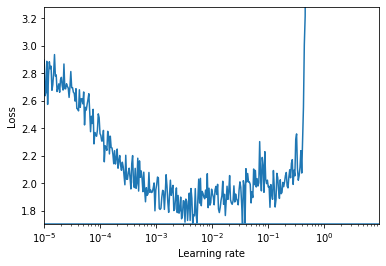

In [37]:
# Usando o código do livro.
rates, losses = find_learning_rate(modelo, train_images, train_labels, epochs=1, batch_size=128)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

Os melhores resultados aparentam ter sido entre 1e-3 e 1e-2.

In [38]:
modelo = keras.Sequential()
modelo.add(keras.layers.Flatten(input_shape = (32, 32, 3)))

for _ in range(20):
    modelo.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    modelo.add(keras.layers.BatchNormalization())
    modelo.add(keras.layers.Activation("elu"))

modelo.add(keras.layers.Dense(10, activation="softmax"))

modelo.compile(optimizer=keras.optimizers.Nadam(learning_rate = 5e-3), 
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(train_images, train_labels, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
1250/1250 [==============================] - 28s 14ms/step - loss: 1.9367 - accuracy: 0.2938 - val_loss: 2.1378 - val_accuracy: 0.2984
Epoch 2/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.7722 - accuracy: 0.3622 - val_loss: 1.8145 - val_accuracy: 0.3513
Epoch 3/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.6858 - accuracy: 0.3953 - val_loss: 1.7742 - val_accuracy: 0.3687
Epoch 4/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.6223 - accuracy: 0.4191 - val_loss: 2.0390 - val_accuracy: 0.3513
Epoch 5/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.5784 - accuracy: 0.4368 - val_loss: 1.9294 - val_accuracy: 0.3849
Epoch 6/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.5344 - accuracy: 0.4542 - val_loss: 1.8870 - val_accuracy: 0.3898
Epoch 7/100
1250/1250 [==============================] - 17s 13ms/step - loss: 1.4906 - accuracy: 0.4685 - val_loss: 1

In [39]:
test_loss, test_acc = modelo.evaluate(test_images, test_labels, verbose=2)
print(f'\nResultado do Teste: {test_acc:.4f}')

313/313 - 1s - loss: 1.5349 - accuracy: 0.4688 - 1s/epoch - 4ms/step

Resultado do Teste: 0.4688


O resultado não foi melhor que o modelo original (com taxa de aprendizado padrão), mas, em teoria, eu teria, agora, um conjunto de taxas para verificar. Nesse ambiente, entretanto, não vou tentar otimizar isso.